<a href="https://colab.research.google.com/github/ajaythakur3369/CodersCave-Internship/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Breast Cancer Prediction**
## **Developed By - Ajay Thakur (ajaythakur3369@gmail.com)**
## **Branch Name - Electronics and Communication Engineering**
## **Institute Name - Indian Institute of Information Technology Kota**
## **Submitted To - CodersCave**
## **Project Link (GitHub) - [Click here](https://github.com/ajaythakur3369/CodersCave-Internship)**

# **Problem Statement -**

The objective of this project is to create a predictive model that can accurately classify breast cancer cases as benign or malignant based on a set of relevant features. By leveraging historical data and applying machine learning techniques, we aim to develop a reliable tool to assist medical professionals in diagnosing breast cancer.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

**Import the Dataset**

In [ ]:
# To access the file, access the Drive from Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
Cancer_df = pd.read_csv("/content/drive/MyDrive/Colab_Notebook/Internship_Name/CodersCave/File_Name/Breast_cancer_dataset.csv", encoding = ('ISO-8859-1'), low_memory = False)

In [ ]:
Cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
Cancer_df.shape

(569, 33)

In [ ]:
print('Number of columns:', len(Cancer_df.columns))
print("Total number of columns present in the dataset", Cancer_df.columns)

Number of columns: 33
Total number of columns present in the dataset Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
Cancer_df.drop(columns = ['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [ ]:
Cancer_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
Cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
print("Total number of null values found: ", Cancer_df.isnull().sum())

Total number of null values found:  diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
print("Total number of duplicate values found: ", Cancer_df.duplicated().sum())

Total number of duplicate values found:  0


In [ ]:
Cancer_df[Cancer_df.duplicated()]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [ ]:
Cancer_df.info

<bound method DataFrame.info of     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678 

In [ ]:
Cancer_df.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0

In [ ]:
Cancer_df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
Cancer_df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

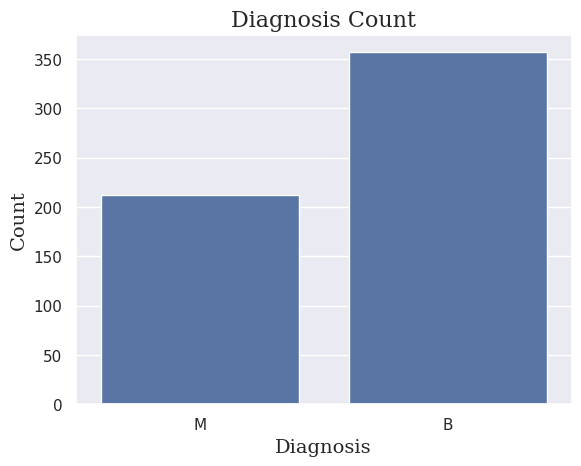

In [ ]:
sns.countplot(data = Cancer_df, x = 'diagnosis')
plt.xlabel('Diagnosis', fontname = 'serif', fontsize = 14)
plt.ylabel('Count', fontname = 'serif', fontsize = 14)
plt.title('Diagnosis Count', fontname = 'serif', fontsize = 16)
plt.show()

**Plotting a box plot for all the numerical features**

In [ ]:
num_feature_list = [f for f in Cancer_df.columns if Cancer_df.dtypes[f] == 'float64']
num_feature_list

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

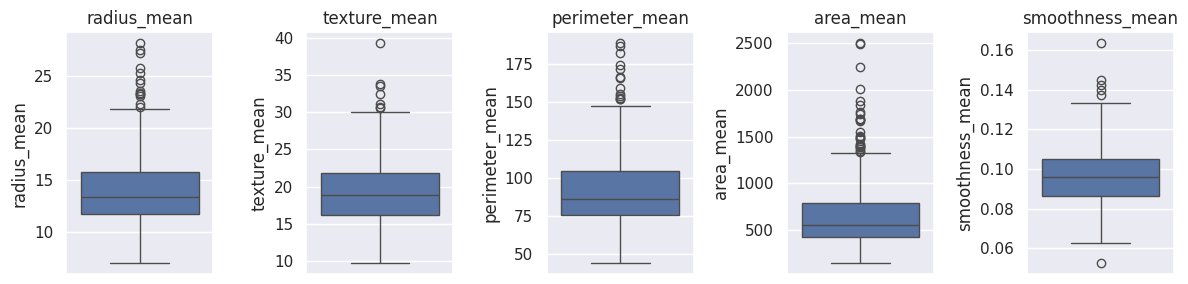

---------------------------


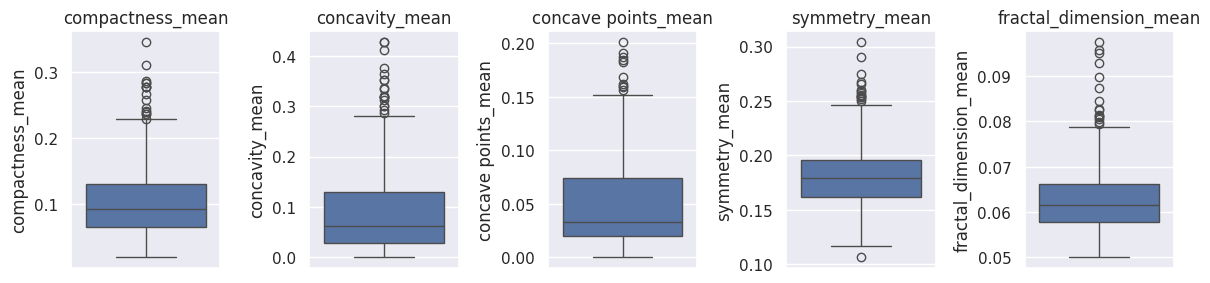

---------------------------


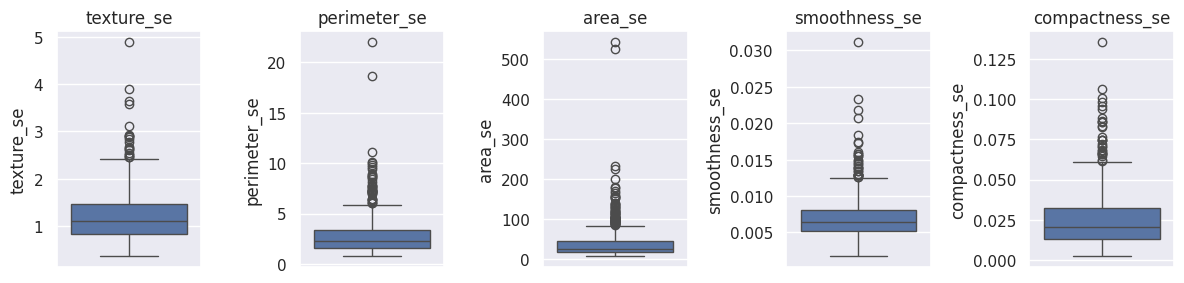

---------------------------


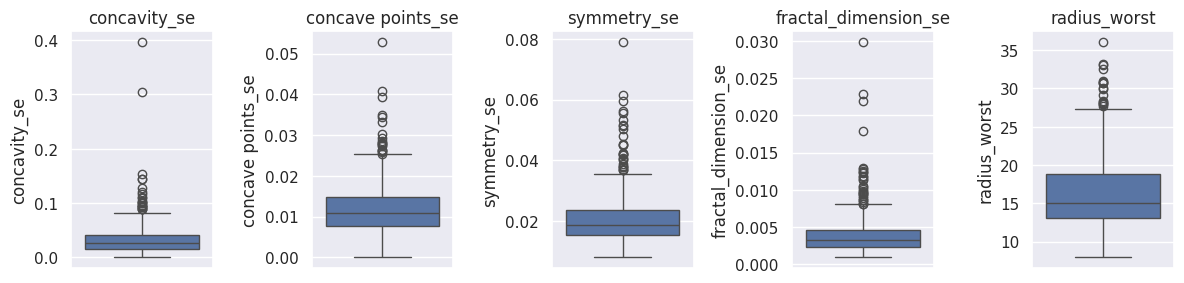

---------------------------


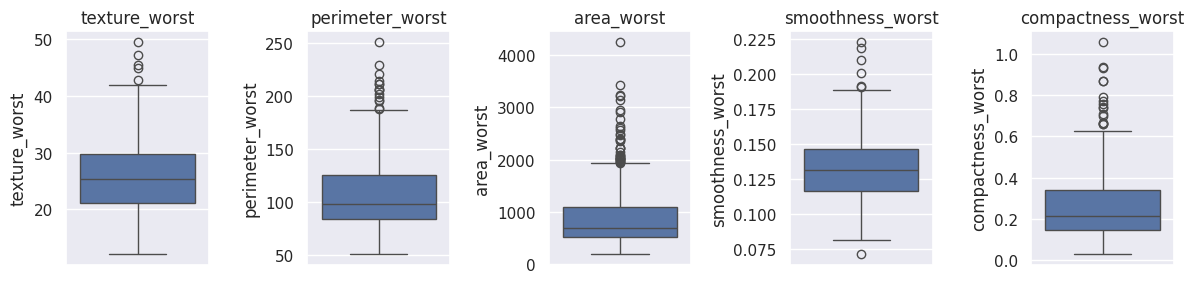

---------------------------


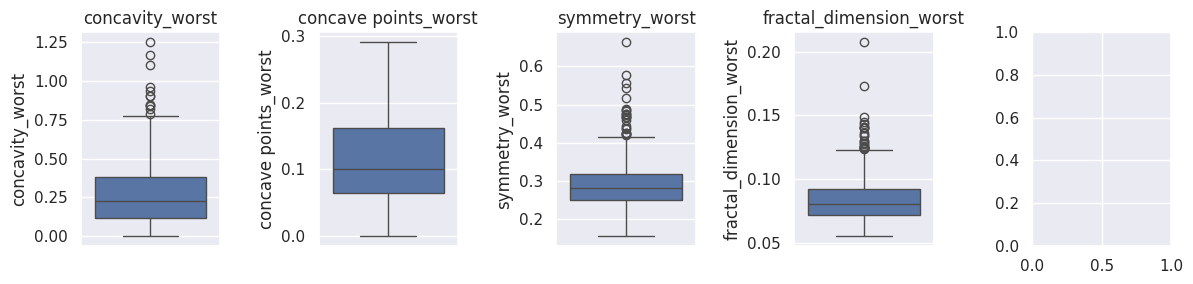

In [ ]:
fig, axes = plt.subplots(ncols = 5, figsize = (12, 3))
for column, axis in zip(num_feature_list[:5], axes):
  sns.boxplot(data = Cancer_df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

print("---------------------------")
fig, axes = plt.subplots(ncols = 5, figsize = (12, 3))
for column, axis in zip(num_feature_list[5:11], axes):
  sns.boxplot(data = Cancer_df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

print("---------------------------")
fig, axes = plt.subplots(ncols = 5, figsize = (12, 3))
for column, axis in zip(num_feature_list[11:16], axes):
  sns.boxplot(data = Cancer_df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

print("---------------------------")
fig, axes = plt.subplots(ncols = 5, figsize = (12, 3))
for column, axis in zip(num_feature_list[16:21], axes):
  sns.boxplot(data = Cancer_df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

print("---------------------------")
fig, axes = plt.subplots(ncols = 5, figsize = (12, 3))
for column, axis in zip(num_feature_list[21:26], axes):
  sns.boxplot(data = Cancer_df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

print("---------------------------")
fig, axes = plt.subplots(ncols = 5, figsize = (12, 3))
for column, axis in zip(num_feature_list[26:30], axes):
  sns.boxplot(data = Cancer_df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

**Outlier Detection and Outlier Capping**

Replacing outliers with the 95th and 5th percentiles for a single variable

In [ ]:
p_05 = Cancer_df['compactness_se'].quantile(0.05)
p_05

0.0078922

In [ ]:
p_95 = Cancer_df['compactness_se'].quantile(0.95)
p_95

0.06057800000000001

In [ ]:
Cancer_df['compactness_se'].clip(p_05, p_95, inplace = True)

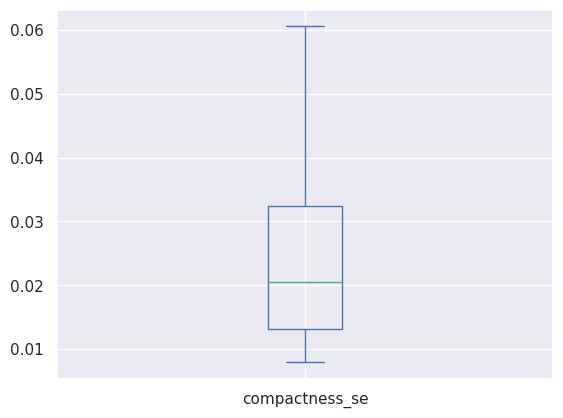

In [ ]:
Cancer_df['compactness_se'].plot(kind = 'box')
plt.show()

In [ ]:
# Creating a list of numerical columns
num_col = Cancer_df.select_dtypes(include = ['int64', 'float64']).columns.tolist()

# Replacing outliers with the 95th and 5th percentiles for a single variable
Cancer_df[num_col] = Cancer_df[num_col].apply(lambda x : x.clip(*x.quantile([0.05, 0.95])))

---------------------------


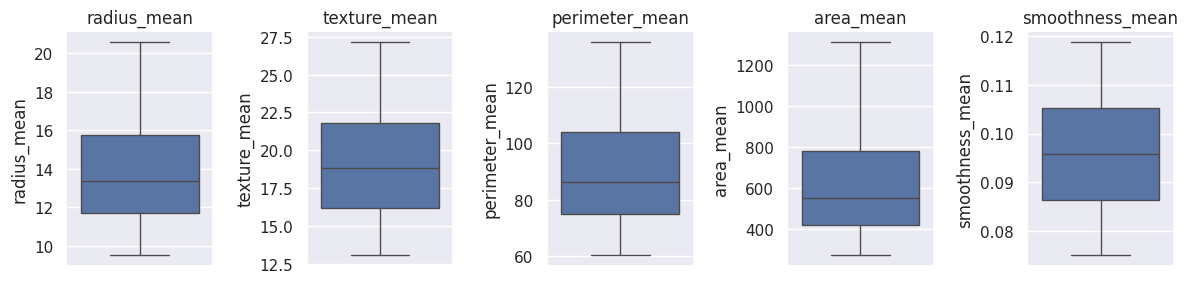

In [ ]:
print("---------------------------")
fig, axes = plt.subplots(ncols = 5, figsize = (12, 3))
for column, axis in zip(num_feature_list[:5], axes):
  sns.boxplot(data = Cancer_df[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

**Check for variance or variability of features with respect to the target feature**

In [ ]:
Df = Cancer_df.groupby('diagnosis').mean().T

In [ ]:
Df.head()

diagnosis,B,M
radius_mean,12.207504,17.166245
texture_mean,17.906880,21.426538
perimeter_mean,78.443681,113.106321
area_mean,466.170924,935.665094
smoothness_mean,0.092532,0.102110


In [ ]:
Df['%Diff'] = round(abs(Df['B'] - Df['M']) / ((Df['B'] + Df['M']) / 2) * 100, 2)

In [ ]:
Df.head()

diagnosis,B,M,%Diff
radius_mean,12.207504,17.166245,33.76
texture_mean,17.906880,21.426538,17.90
perimeter_mean,78.443681,113.106321,36.19
area_mean,466.170924,935.665094,66.98
smoothness_mean,0.092532,0.102110,9.84


In [ ]:
Df.sort_values( by = '%Diff', ascending = False)

diagnosis,B,M,%Diff
concavity_mean,0.045528,0.153109,108.32
concave points_mean,0.025995,0.084424,105.83
area_se,21.284986,64.435613,100.68
concavity_worst,0.164886,0.437035,90.43
area_worst,562.688627,1350.750472,82.37
concave points_worst,0.075657,0.179334,81.32
perimeter_se,2.009978,4.039610,67.10
area_mean,466.170924,935.665094,66.98
radius_se,0.285809,0.571912,66.71
compactness_worst,0.183662,0.356715,64.05


**Checking for multicollinearity**

In [ ]:
independent_variable = Cancer_df.drop(['diagnosis'], axis = 1)
independent_variable.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,13.088,122.80,1001.0,0.11840,0.20870,0.24302,0.12574,0.23072,0.07609,...,25.38,17.33,171.64,2009.6,0.16220,0.56412,0.68238,0.23692,0.40616,0.11890
1,20.57,17.770,132.90,1309.8,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,...,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902
2,19.69,21.250,130.00,1203.0,0.10960,0.15990,0.19740,0.12574,0.20690,0.05999,...,23.57,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.23692,0.36130,0.08758
3,11.42,20.380,77.58,386.1,0.11878,0.20870,0.24140,0.10520,0.23072,0.07609,...,14.91,26.50,98.87,567.7,0.17184,0.56412,0.68238,0.23692,0.40616,0.11952
4,20.29,14.340,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.18090,0.05883,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.23640,0.07678


**Correlation Matrix**

In [ ]:
corr_matrix = independent_variable.corr()
corr_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.350097,0.997964,0.994257,0.172086,0.507693,0.678482,0.808524,0.149761,-0.304946,...,0.974078,0.315988,0.968877,0.959451,0.144436,0.460516,0.572206,0.745270,0.201963,0.042035
texture_mean,0.350097,1.000000,0.357333,0.356116,0.009937,0.261811,0.342739,0.322095,0.101514,-0.055638,...,0.371069,0.908453,0.381532,0.369712,0.094329,0.289575,0.331189,0.319199,0.122509,0.122507
perimeter_mean,0.997964,0.357333,1.000000,0.992128,0.206166,0.553824,0.714477,0.836219,0.180658,-0.258566,...,0.975533,0.323901,0.975054,0.960643,0.174199,0.502363,0.607630,0.773453,0.225426,0.086780
area_mean,0.994257,0.356116,0.992128,1.000000,0.176203,0.506211,0.686530,0.812949,0.158075,-0.288064,...,0.974732,0.317470,0.969040,0.971586,0.151854,0.449443,0.568897,0.738696,0.195308,0.043673
smoothness_mean,0.172086,0.009937,0.206166,0.176203,1.000000,0.659564,0.530444,0.563261,0.548158,0.585084,...,0.232808,0.057477,0.255038,0.233636,0.802662,0.479967,0.448187,0.511857,0.406939,0.505476
compactness_mean,0.507693,0.261811,0.553824,0.506211,0.659564,1.000000,0.893477,0.835693,0.586610,0.551310,...,0.552655,0.253512,0.600483,0.544162,0.563054,0.885100,0.838728,0.822846,0.494582,0.711443
concavity_mean,0.678482,0.342739,0.714477,0.686530,0.530444,0.893477,1.000000,0.930912,0.489085,0.321597,...,0.711410,0.328374,0.746625,0.710002,0.472957,0.803804,0.909931,0.887361,0.424258,0.556981
concave points_mean,0.808524,0.322095,0.836219,0.812949,0.563261,0.835693,0.930912,1.000000,0.460820,0.172513,...,0.833774,0.309512,0.855791,0.827609,0.472905,0.712209,0.795999,0.921705,0.396997,0.411332
symmetry_mean,0.149761,0.101514,0.180658,0.158075,0.548158,0.586610,0.489085,0.460820,1.000000,0.473874,...,0.199159,0.115363,0.228724,0.200934,0.426030,0.478423,0.443023,0.428070,0.704240,0.456438
fractal_dimension_mean,-0.304946,-0.055638,-0.258566,-0.288064,0.585084,0.551310,0.321597,0.172513,0.473874,1.000000,...,-0.236244,-0.039196,-0.189683,-0.220468,0.499533,0.452134,0.324961,0.178187,0.324983,0.774986


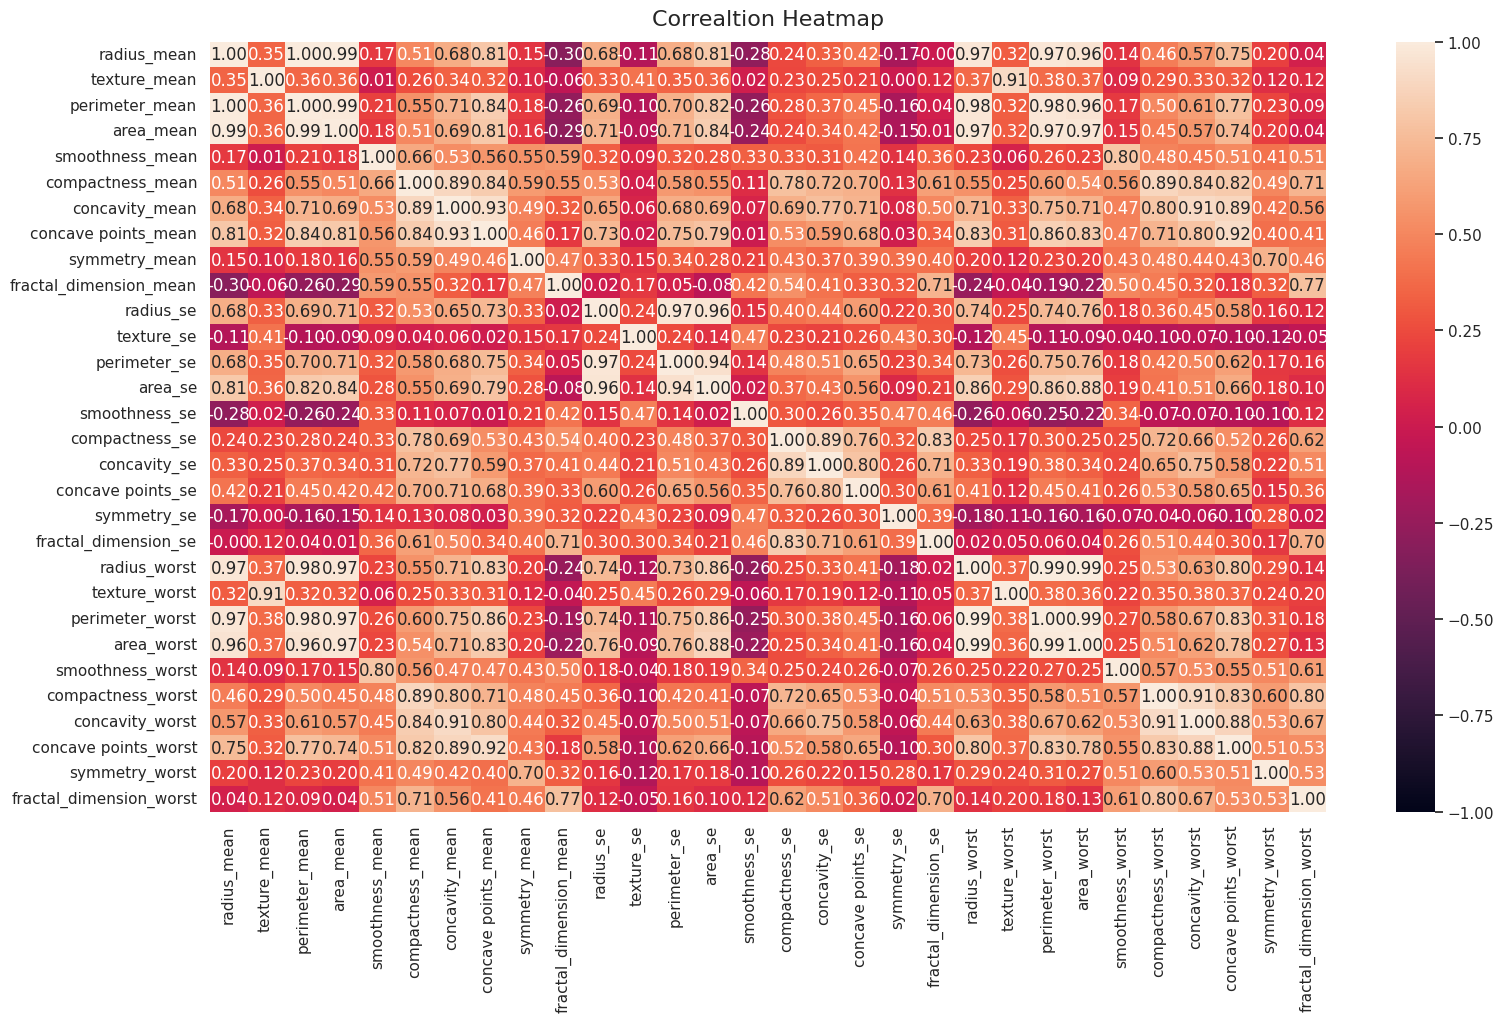

In [ ]:
plt.figure(figsize = (18, 10))
heatmap = sns.heatmap(corr_matrix, vmin = -1, vmax = 1, annot = True, fmt = '.2f')
heatmap.set_title('Correaltion Heatmap', fontdict = {'fontsize':16}, pad = 12)
plt.show()

**Upper Triangular Matrix**

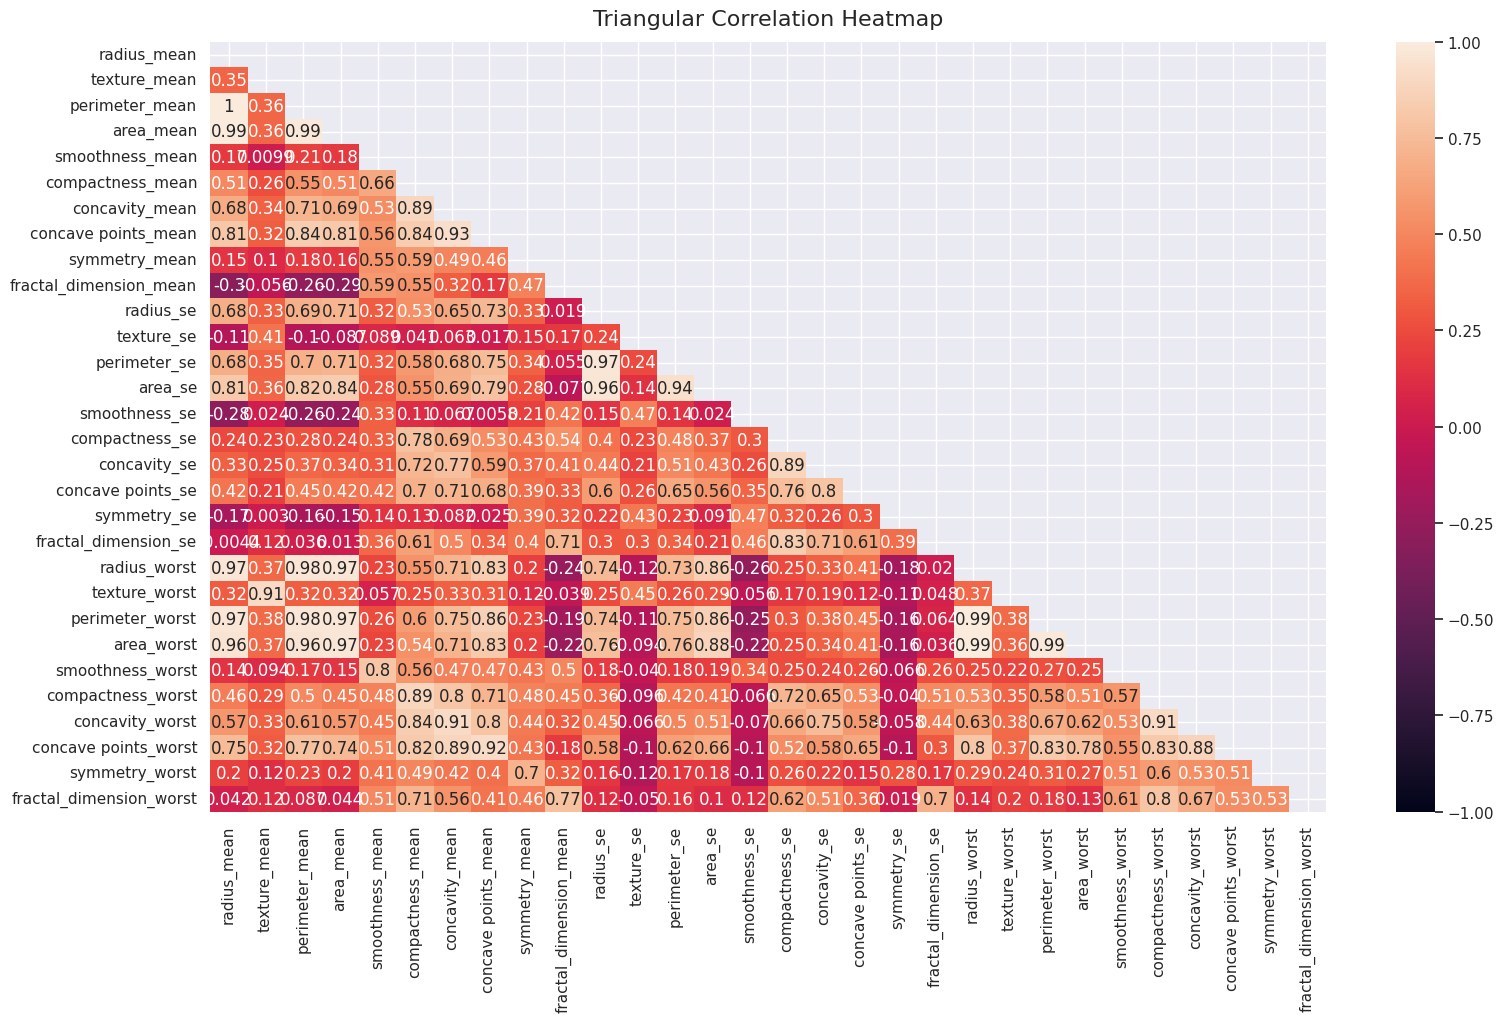

In [ ]:
plt.figure(figsize = (18, 10))
# Define a mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool_))
heatmap = sns.heatmap(corr_matrix, mask = mask, vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Triangular Correlation Heatmap', fontdict = {'fontsize':16}, pad = 12)
plt.show()

**Creating the Correlation Matrix and selecting the upper triangular matrix**

In [ ]:
cor_matrix = corr_matrix.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k = 1).astype(np.bool_))
upper_tri

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,NaN,0.350097,0.997964,0.994257,0.172086,0.507693,0.678482,0.808524,0.149761,0.304946,...,0.974078,0.315988,0.968877,0.959451,0.144436,0.460516,0.572206,0.745270,0.201963,0.042035
texture_mean,NaN,NaN,0.357333,0.356116,0.009937,0.261811,0.342739,0.322095,0.101514,0.055638,...,0.371069,0.908453,0.381532,0.369712,0.094329,0.289575,0.331189,0.319199,0.122509,0.122507
perimeter_mean,NaN,NaN,NaN,0.992128,0.206166,0.553824,0.714477,0.836219,0.180658,0.258566,...,0.975533,0.323901,0.975054,0.960643,0.174199,0.502363,0.607630,0.773453,0.225426,0.086780
area_mean,NaN,NaN,NaN,NaN,0.176203,0.506211,0.686530,0.812949,0.158075,0.288064,...,0.974732,0.317470,0.969040,0.971586,0.151854,0.449443,0.568897,0.738696,0.195308,0.043673
smoothness_mean,NaN,NaN,NaN,NaN,NaN,0.659564,0.530444,0.563261,0.548158,0.585084,...,0.232808,0.057477,0.255038,0.233636,0.802662,0.479967,0.448187,0.511857,0.406939,0.505476
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,0.893477,0.835693,0.586610,0.551310,...,0.552655,0.253512,0.600483,0.544162,0.563054,0.885100,0.838728,0.822846,0.494582,0.711443
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.930912,0.489085,0.321597,...,0.711410,0.328374,0.746625,0.710002,0.472957,0.803804,0.909931,0.887361,0.424258,0.556981
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460820,0.172513,...,0.833774,0.309512,0.855791,0.827609,0.472905,0.712209,0.795999,0.921705,0.396997,0.411332
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.473874,...,0.199159,0.115363,0.228724,0.200934,0.426030,0.478423,0.443023,0.428070,0.704240,0.456438
fractal_dimension_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.236244,0.039196,0.189683,0.220468,0.499533,0.452134,0.324961,0.178187,0.324983,0.774986


**Dropping columns with a correlation coefficient greater than 95%**

In [ ]:
feature_to_drop = [ column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print()
print(feature_to_drop)


['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


**New Dataframe**

In [ ]:
independent_variable1 = independent_variable.drop(feature_to_drop, axis = 1)
independent_variable1.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,13.088,0.11840,0.20870,0.24302,0.12574,0.23072,0.07609,0.95952,0.9053,...,0.01587,0.030030,0.006193,17.33,0.16220,0.56412,0.68238,0.23692,0.40616,0.11890
1,20.57,17.770,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,0.54350,0.7339,...,0.01340,0.013890,0.003532,23.41,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902
2,19.69,21.250,0.10960,0.15990,0.19740,0.12574,0.20690,0.05999,0.74560,0.7869,...,0.02058,0.022500,0.004571,25.53,0.14440,0.42450,0.45040,0.23692,0.36130,0.08758
3,11.42,20.380,0.11878,0.20870,0.24140,0.10520,0.23072,0.07609,0.49560,1.1560,...,0.01867,0.034988,0.007960,26.50,0.17184,0.56412,0.68238,0.23692,0.40616,0.11952
4,20.29,14.340,0.10030,0.13280,0.19800,0.10430,0.18090,0.05883,0.75720,0.7813,...,0.01885,0.017560,0.005115,16.67,0.13740,0.20500,0.40000,0.16250,0.23640,0.07678


**Check the column for low variance**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
threshold_n = 0.99
sel = VarianceThreshold( threshold = (threshold_n* (1 - threshold_n)))
sel_var = sel.fit_transform(independent_variable)
independent_variable[independent_variable.columns[sel.get_support(indices = True)]]

,radius_mean,texture_mean,perimeter_mean,area_mean,radius_se,texture_se,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst
0,17.9900,13.088,122.800,1001.00,0.95952,0.9053,7.0416,115.80,25.380,17.33,171.640,2009.60,0.564120,0.68238
1,20.5700,17.770,132.900,1309.80,0.54350,0.7339,3.3980,74.08,24.990,23.41,158.800,1956.00,0.186600,0.24160
2,19.6900,21.250,130.000,1203.00,0.74560,0.7869,4.5850,94.03,23.570,25.53,152.500,1709.00,0.424500,0.45040
3,11.4200,20.380,77.580,386.10,0.49560,1.1560,3.4450,27.23,14.910,26.50,98.870,567.70,0.564120,0.68238
4,20.2900,14.340,135.100,1297.00,0.75720,0.7813,5.4380,94.44,22.540,16.67,152.200,1575.00,0.205000,0.40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,20.5760,22.390,135.820,1309.80,0.95952,1.2560,7.0416,115.80,25.450,26.40,166.100,2009.60,0.211300,0.41070
565,20.1300,27.150,131.200,1261.00,0.76550,2.2120,5.2030,99.04,23.690,36.30,155.000,1731.00,0.192200,0.32150
566,16.6000,27.150,108.300,858.10,0.45640,1.0750,3.4250,48.55,18.980,34.12,126.700,1124.00,0.309400,0.34030
567,20.5760,27.150,135.820,1265.00,0.72600,1.5950,5.7720,86.22,25.640,36.30,171.640,1821.00,0.564120,0.68238


**Converting the Target Variable into Numerical**

*   Diagnosis: M = 1
*   Diagnosis: B = 0




In [ ]:
Target_variable = Cancer_df['diagnosis'].apply(lambda x : 1 if x == 'M' else 0)
Target_variable.value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64>

In [ ]:
X = independent_variable1
Y = Target_variable

In [ ]:
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,13.088,0.11840,0.20870,0.24302,0.12574,0.23072,0.07609,0.95952,0.9053,...,0.01587,0.030030,0.006193,17.33,0.16220,0.56412,0.68238,0.23692,0.40616,0.11890
1,20.57,17.770,0.08474,0.07864,0.08690,0.07017,0.18120,0.05667,0.54350,0.7339,...,0.01340,0.013890,0.003532,23.41,0.12380,0.18660,0.24160,0.18600,0.27500,0.08902
2,19.69,21.250,0.10960,0.15990,0.19740,0.12574,0.20690,0.05999,0.74560,0.7869,...,0.02058,0.022500,0.004571,25.53,0.14440,0.42450,0.45040,0.23692,0.36130,0.08758
3,11.42,20.380,0.11878,0.20870,0.24140,0.10520,0.23072,0.07609,0.49560,1.1560,...,0.01867,0.034988,0.007960,26.50,0.17184,0.56412,0.68238,0.23692,0.40616,0.11952
4,20.29,14.340,0.10030,0.13280,0.19800,0.10430,0.18090,0.05883,0.75720,0.7813,...,0.01885,0.017560,0.005115,16.67,0.13740,0.20500,0.40000,0.16250,0.23640,0.07678


**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [ ]:
X_scaled = std_scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 1.23905995, -1.57426143,  1.7944261 , ...,  1.97363218,
         2.34002465,  2.311078  ],
       [ 2.05146513, -0.37191295, -0.91422395, ...,  1.15414711,
        -0.26172399,  0.3698075 ],
       [ 1.77436569,  0.52175914,  1.0862823 , ...,  1.97363218,
         1.45016155,  0.2762523 ],
       ...,
       [ 0.80136879,  2.03689285, -0.92951341, ...,  0.44281091,
        -1.31702307, -0.33315591],
       [ 2.05335444,  2.03689285,  1.74614357, ...,  1.97363218,
         2.34002465,  2.35135871],
       [-1.42512521,  1.36663878, -1.69463061, ..., -1.44840998,
        -0.02170296, -0.84056296]])

**Splitting data into Training and Testing datasets**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.shape, x_test.shape

((455, 23), (114, 23))

**Model Building:**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**Evaluation Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

**1. Logistic Regression Model**

In [ ]:
print("--------------Logistic Regression---------------")
Lr_Model = LogisticRegression()
Lr_Model.fit(x_train, y_train)
y_pred_Lr = Lr_Model.predict(x_test)
print(classification_report(y_test, y_pred_Lr))

--------------Logistic Regression---------------
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



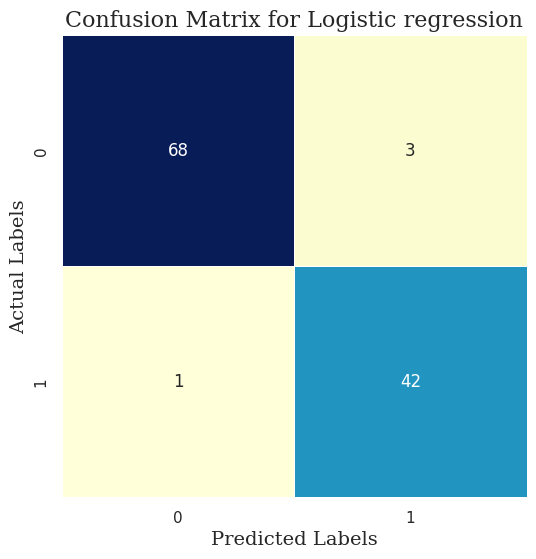

In [ ]:
cm = confusion_matrix(y_test, y_pred_Lr)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = 'd', linewidths = .5, cbar = False)
plt.xlabel('Predicted Labels', fontname = 'serif', fontsize = 14)
plt.ylabel('Actual Labels', fontname = 'serif', fontsize = 14)
plt.title('Confusion Matrix for Logistic regression', fontname = 'serif', fontsize = 16)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(Lr_Model, x_train, y_train, cv = 5)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

cross_result = pd.DataFrame([['Logistic regression', round(accuracies.mean()*100, 2), round(accuracies.std()*100, 2)]],
                            columns = ['Model', 'Accuracy (mean)', 'Standard Deviation'])

Accuracy is 97.14 %
Standard Deviation is 0.88 %


In [ ]:
cross_result

,Model,Accuracy (mean),Standard Deviation
0,Logistic regression,97.14,0.88


**2. Decision Tree Model**

In [ ]:
print("--------------Decision Tree Classification ---------------")
Dt_Model = DecisionTreeClassifier()
Dt_Model.fit(x_train, y_train)
y_pred_Dt = Dt_Model.predict(x_test)
print(classification_report(y_test, y_pred_Dt))

--------------Decision Tree Classification ---------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



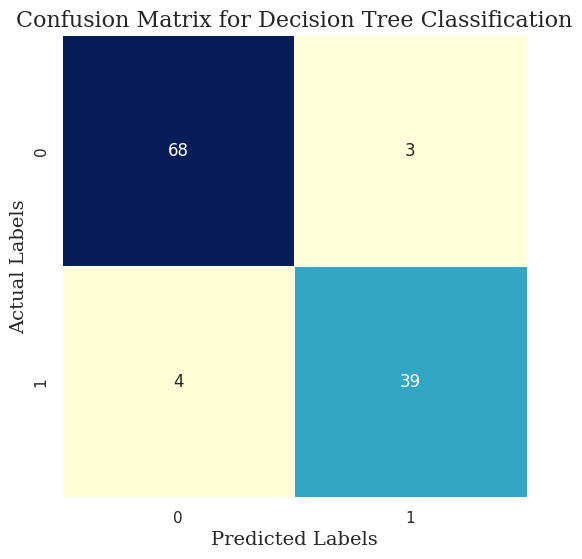

In [ ]:
cm = confusion_matrix(y_test, y_pred_Dt)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = 'd', linewidths = .5, cbar = False)
plt.xlabel('Predicted Labels', fontname = 'serif', fontsize = 14)
plt.ylabel('Actual Labels', fontname = 'serif', fontsize = 14)
plt.title('Confusion Matrix for Decision Tree Classification', fontname = 'serif', fontsize = 16)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(Dt_Model, x_train, y_train, cv = 5)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

cross_result = pd.DataFrame([['Decision tree classification', round(accuracies.mean()*100, 2), round(accuracies.std()*100, 2)]] ,
                            columns = ['Model', 'Accuracy (mean)', 'Standard Deviation'])

Accuracy is 90.99 %
Standard Deviation is 3.29 %


In [ ]:
cross_result

,Model,Accuracy (mean),Standard Deviation
0,Decision tree classification,90.99,3.29


**3. Random Forest Model**

In [ ]:
print("-------------- Random Forest Model ---------------")
Rf_Model = RandomForestClassifier()
Rf_Model.fit(x_train, y_train)
y_pred_Rf = Rf_Model.predict(x_test)
print(classification_report(y_test, y_pred_Rf))

-------------- Random Forest Model ---------------
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



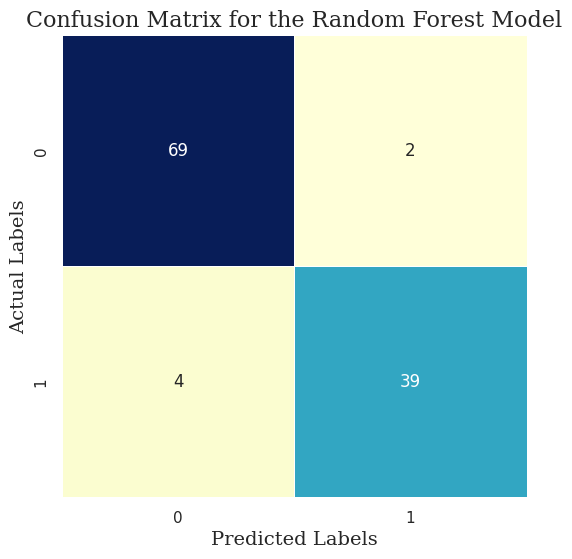

In [ ]:
cm = confusion_matrix(y_test, y_pred_Rf)
plt.figure(figsize = (6, 6))
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = 'd', linewidths = .5, cbar = False)

plt.xlabel('Predicted Labels', fontname = 'serif', fontsize = 14)
plt.ylabel('Actual Labels', fontname = 'serif', fontsize = 14)
plt.title('Confusion Matrix for the Random Forest Model', fontname = 'serif', fontsize = 16)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(Rf_Model, x_train, y_train, cv = 5)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

cross_result = pd.DataFrame([['Random Forest', round(accuracies.mean()*100, 2), round(accuracies.std()*100, 2)]],
                            columns = ['Model', 'Accuracy (mean)', 'Standard Deviation'])

Accuracy is 94.95 %
Standard Deviation is 1.32 %


**Conclusion -** We used 3 algorithms to predict, and the accuracy is as follows:

Logistic Regression = 0.9714

Decision Tree = 0.9143

Random Forest = 0.9560

As we can see, logistic regression is the best model for prediction.